## 5장 로지스틱 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 혹시 시간 있으면

 - $H(x)$ (hypothesis 가설 함수): 주어진 $x$ 값에 대해 예측을 어떻게 할 것인가 

 $H(x)=ax+b$

 - $cost(ax+b)(비용함수)=MSE$ : $H(x)$ 가 $y$ 를 얼마나 잘 예측했는가

- cost function,loss function,objective function 비슷한 맥락에서 사용 

[미묘한 차이 존재](https://blog.naver.com/PostView.nhn?blogId=qbxlvnf11&logNo=221386278997&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView)

용어 정리 ..??

## 기존의 선형 함수와 MSE를 그대로 이용할 수 있을까?

### 가설 함수
$$ y =ax +b $$
왜안되나?
-> 시그모이드 사용
### 오차함수
MSE ->
왜 안되나?(극소점에 빠짐 nonconvex)
-> binary cross entropy



### 시그모이드 함수 -> 가설 함수
$$ y = \frac{1}{1+e^{-(ax+b)}} $$

### 오차함수
$$ cost(W) = -\frac{1}{n} \sum y \log\left(H(x)\right) + (1-y) \left( \log(1-H(x) \right) $$

In [ ]:
# 데이터 설정

data = [[2,False],[4,False],[6,False],[8,True],[10,True],[12,True],[14,True]] # 시험시간 , 합격 여부(True/합,False/불합)
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]
x_data,y_data

([2, 4, 6, 8, 10, 12, 14], [False, False, False, True, True, True, True])

## True,False 는 Boolean 형 
true false 말고도 문자열 데이터도 존재 하기도 함

-> 컴퓨터가 알아먹을수 있게 숫자로 바꿔줘야함 => 데이터 인코딩 

In [ ]:
y_data = list(map(int,y_data))
y_data

[0, 0, 0, 1, 1, 1, 1]

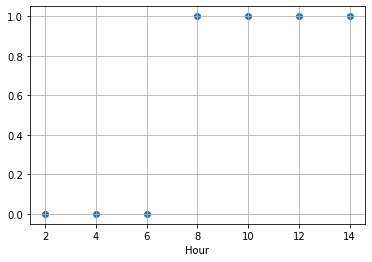

In [ ]:
plt.scatter(x_data,y_data)
plt.xlabel('Hour')
plt.grid(True)

## 학습 단계

In [ ]:
## 시그모이드 함수 
def sigmoid(x):
  return 1/(1+np.e**(-x))

In [ ]:
## 오차함수를 각각 a,b로 편 미분 
a = 0
b = 0
#a,b 초기화
epochs = 2001
lr = 0.05

## 편미분 어렵나..? 
## binary cross entropy 언급?


In [ ]:
for i in range(epochs):
  for x,y in data:
    # 미분값
    a_diff = x*(sigmoid(a*x+b)-int(y))
    b_diff = sigmoid(a*x+b)-int(y)
    #갱신
    a-= lr*a_diff
    b-= lr*b_diff

  if i%100==0:
    print("epoch:.%f, a:%.4f , b:%.4f"%(i,a,b))
          

epoch:.0.000000, a:0.2860 , b:-0.0029
epoch:.100.000000, a:0.6458 , b:-3.2469
epoch:.200.000000, a:0.8366 , b:-4.8272
epoch:.300.000000, a:0.9717 , b:-5.9082
epoch:.400.000000, a:1.0791 , b:-6.7520
epoch:.500.000000, a:1.1698 , b:-7.4548
epoch:.600.000000, a:1.2491 , b:-8.0630
epoch:.700.000000, a:1.3200 , b:-8.6023
epoch:.800.000000, a:1.3844 , b:-9.0889
epoch:.900.000000, a:1.4436 , b:-9.5336
epoch:.1000.000000, a:1.4985 , b:-9.9440
epoch:.1100.000000, a:1.5497 , b:-10.3257
epoch:.1200.000000, a:1.5978 , b:-10.6829
epoch:.1300.000000, a:1.6432 , b:-11.0189
epoch:.1400.000000, a:1.6863 , b:-11.3365
epoch:.1500.000000, a:1.7272 , b:-11.6376
epoch:.1600.000000, a:1.7662 , b:-11.9242
epoch:.1700.000000, a:1.8036 , b:-12.1977
epoch:.1800.000000, a:1.8394 , b:-12.4594
epoch:.1900.000000, a:1.8737 , b:-12.7102
epoch:.2000.000000, a:1.9068 , b:-12.9513


## 결과 확인

[0, 0, 0, 1, 1, 1, 1]

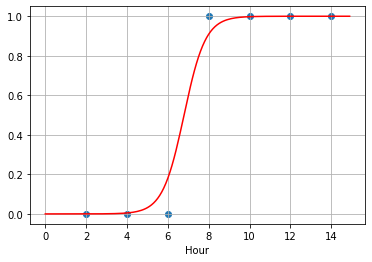

In [ ]:
plt.scatter(x_data,y_data)
plt.xlabel('Hour')

x_range=(np.arange(0,15,0.1))
plt.plot(x_range,np.array([sigmoid(a*x+b) for x in x_range]),'r')
plt.grid(True)
y_data

3시간을 공부하면 합격하나?

In [ ]:
print((sigmoid(a*3+b))>0.5) # 0.5 를 기준

False


## 0 1 , Yes NO 가 아닌 Class 1 2 3 이면?
다중 분류 문제 -> 다음 12장에서  

## 선형 회귀 , 분류 

총정리 
큰그림 정리 필요

### 예측을 위해 가설함수 설정? (ax+b)

### 얼마나 예측이 잘된건가 평가 -> 오차 함수(MSE)

### 이 오차를 어떻게 줄여나갈 것인가 -> 경사하강법


